In this practice activity you'll continue to work with the titanic dataset in ways that flex what you've learned about both data wrangling and data visualization.

In [8]:
import numpy as np
import pandas as pd

data_dir = "https://dlsun.github.io/pods/data/"
df_titanic = pd.read_csv(data_dir + "titanic.csv")

df_titanic.head()

,name,gender,age,class,embarked,country,ticketno,fare,survived
0,"Abbing, Mr. Anthony",male,42.0,3rd,S,United States,5547.0,7.11,0
1,"Abbott, Mr. Eugene Joseph",male,13.0,3rd,S,United States,2673.0,20.05,0
2,"Abbott, Mr. Rossmore Edward",male,16.0,3rd,S,United States,2673.0,20.05,0
3,"Abbott, Mrs. Rhoda Mary 'Rosa'",female,39.0,3rd,S,England,2673.0,20.05,1
4,"Abelseth, Miss. Karen Marie",female,16.0,3rd,S,Norway,348125.0,7.13,1


## 1. Filter the data to include passengers only. Calculate the joint distribution (cross-tab) between a passenger's class and where they embarked.

In [13]:
# Filter the data to include passengers only
df_titanic["type"] = df_titanic["class"].map({
    "1st": "passenger",
    "2nd": "passenger",
    "3rd": "passenger",
    "victualling crew": "crew",
    "engineering crew": "crew",
    "deck crew": "crew"
})

df_titanic_passenger = df_titanic[(df_titanic["type"] == 'passenger')]
df_titanic_passenger.head()

# Calculate the joint distribution (cross-tab) between a passenger's class and where they embarked.
pd.crosstab(df_titanic_passenger["class"], df_titanic_passenger["embarked"])


embarked,B,C,Q,S
class,,,,
1st,3,143,3,175
2nd,6,26,7,245
3rd,0,102,113,494


## 2. Using the joint distribution that calculated above, calculate the following:

* the conditional distribution of their class given where they embarked
* the conditional distribution of where they embarked given their class

Use the conditional distributions that you calculate to answer the following quesitons:

* What proportion of 3rd class passengers embarked at Southampton?
* What proportion of Southampton passengers were in 3rd class?

In [19]:
# Conditional distribution of their class given where they embarked
pd.crosstab(df_titanic_passenger["class"], df_titanic_passenger["embarked"], normalize='columns')

embarked,B,C,Q,S
class,,,,
1st,0.333333,0.527675,0.024390,0.191466
2nd,0.666667,0.095941,0.056911,0.268053
3rd,0.000000,0.376384,0.918699,0.540481


In [20]:
# Conditional distribution of where they embarked given their class
pd.crosstab(df_titanic_passenger["class"], df_titanic_passenger["embarked"], normalize='index')

# alternative way
# pd.crosstab(df_titanic_passenger["embarked"], df_titanic_passenger["class"], normalize='columns')

embarked,B,C,Q,S
class,,,,
1st,0.009259,0.441358,0.009259,0.540123
2nd,0.021127,0.091549,0.024648,0.862676
3rd,0.000000,0.143865,0.159379,0.696756


**What proportion of 3rd class passengers embarked at Southampton?**  
0.697  
**What proportion of Southampton passengers were in 3rd class?**  
0.540

## 3. Make a visualization showing the distribution of a passenger's class, given where they embarked.

Discuss the pros and cons of using this visualization versus the distributions you calculated before, to answer the previous questions.

<Axes: xlabel='embarked'>

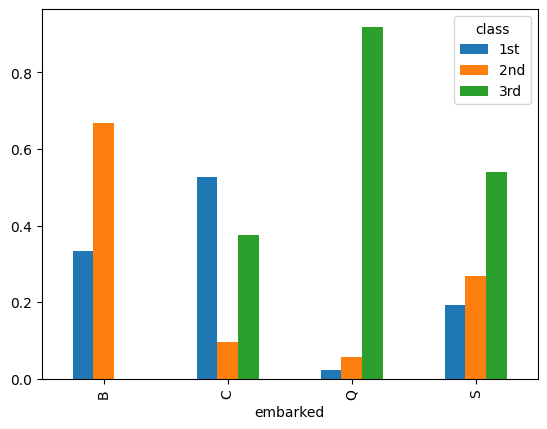

In [28]:
# visualization showing the distribution of a passenger's class, given where they embarked
pd.crosstab(df_titanic_passenger["embarked"], df_titanic_passenger["class"], normalize='index').plot(kind='bar')